In [8]:
import cv2
import numpy as np
from utils import APF, PRM
from matplotlib import pyplot as plt
import time

In [2]:
file_path = "/home/anisha/sick/planner_ws/src/PRM-Blended-Potential-Field-Path-Planning/prm_apf_planner/map/map.png"

grid_map = cv2.imread(file_path, 0)
print(grid_map.shape)
print(grid_map)
# cv2.imshow("hi", grid_map)
# cv2.waitKey(0) 
# cv2.destroyAllWindows() 

thresh = 127
im_bw = cv2.threshold(
    grid_map,
    thresh,
    255,
    cv2.THRESH_BINARY)[1]

kernel = np.ones((3, 3), np.uint8)
im_bw = cv2.erode(im_bw, kernel, iterations=1)
im_bw = cv2.copyMakeBorder(
            im_bw, 3, 3, 3, 3, cv2.BORDER_CONSTANT, value=0)
im_bw = cv2.rotate(im_bw, cv2.ROTATE_90_CLOCKWISE)
# cv2.imshow("hi", im_bw)
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

inflated_map = im_bw
influence_coefficient = 100
repulsion_range = 5
print("here")

(100, 100)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
here


In [3]:
t1 = time.time()
apf = APF(influence_coefficient, repulsion_range)
sampling_points, samples_obs_region, samples_open_region = apf.sampling(
    inflated_map)
print("apf done")
t2 = time.time()

inside sampling
apf done


In [4]:
print("time taken by apf : ", t2-t1)

time taken by apf :  175.37958931922913


(106, 106)


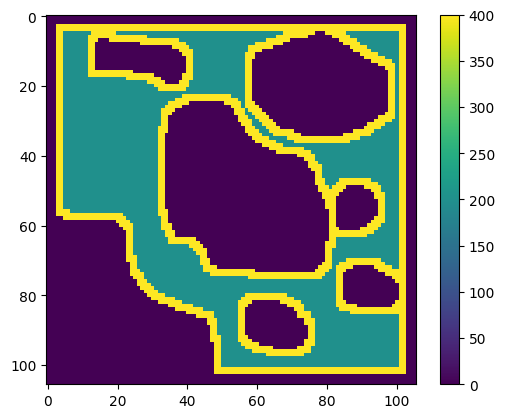

In [7]:
print(im_bw.shape)
# print(samples_obs_region.shape)
# print(samples_open_region.shape)
new = np.zeros(im_bw.shape)
for i in samples_obs_region:
    new[i[0], i[1]] = 400
for i in samples_open_region:
    new[i[0], i[1]] = 200
plt.imshow(new)
plt.colorbar()
plt.show()

In [11]:
start = [6, 1]
goal = [19, 19]

# Scale five times
start[0] = start[0] * 5
start[1] = start[1] * 5
goal[0] = goal[0] * 5
goal[1] = goal[1] * 5
Prm = PRM(
        start,
        goal,
        sampling_points,
        samples_obs_region,
        samples_open_region)

In [12]:
Prm.prm()

Solving...
Path Found !!!
Coordinates saved in results/data.csv


FileNotFoundError: [Errno 2] No such file or directory: './results/data.csv'

Error in callback <function flush_figures at 0x7f38049c34c0> (for post_execute):


KeyboardInterrupt: 

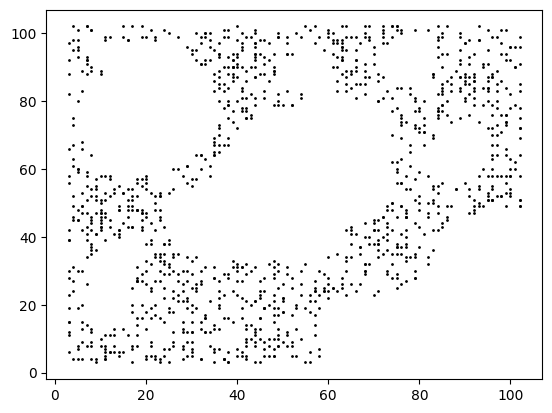

In [10]:
Prm.samplingCoords()
Prm.checkForObstacle()